## Section 3.2 - Part 1 - Social Analytics

### What were the top 50 most popular subreddits in terms of the number of active users?

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import string

In [96]:
%%bigquery popular_subreddits_top50

SELECT subreddit, COUNT(DISTINCT author) AS total_active_users 
FROM `fh-bigquery.reddit_comments.2014` 
GROUP BY subreddit 
ORDER BY total_active_users 
DESC limit 50

Query is running:   0%|          |

Downloading:   0%|          |

In [97]:
%store popular_subreddits_top50

Stored 'popular_subreddits_top50' (DataFrame)


In [98]:
%store -r popular_subreddits_top50

In [99]:
popular_subreddits_top50.head()

,subreddit,total_active_users
0,AskReddit,1942569
1,funny,1128979
2,pics,1016309
3,AdviceAnimals,725298
4,videos,694278


popular_subreddits is a dataframe containing the 50 most popular subreddits along with their number of user comments which we are using to define popularity

###  What does the Probability Density Function (PDF) of the number of active users per subreddit look like for all subreddits?

In [100]:
%%bigquery popular_subreddits

SELECT subreddit, COUNT(DISTINCT author) AS total_active_users 
FROM `fh-bigquery.reddit_comments.2014` 
GROUP BY subreddit 
ORDER BY total_active_users 

Query is running:   0%|          |

Downloading:   0%|          |

In [101]:
%store popular_subreddits

Stored 'popular_subreddits' (DataFrame)


In [102]:
%store -r popular_subreddits

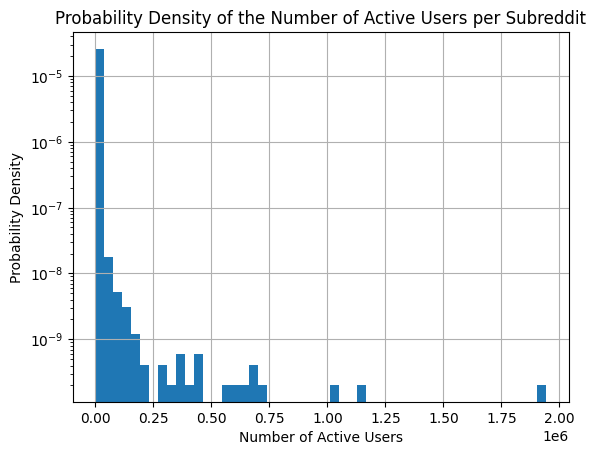

In [103]:
plt.hist(x=popular_subreddits['total_active_users'], density = True, bins = 50)

plt.title("Probability Density of the Number of Active Users per Subreddit")
plt.xlabel("Number of Active Users")
plt.ylabel("Probability Density")
plt.yscale("log")
plt.grid()

here is the Probability Density of the number of active users per subreddit, where it is quite obvious that the vast majority of subreddits have a much smaller player count than the more popular subreddits

###  What is the proportion between the number of users in the ith popular subreddit compared to the (i + 1)th for i ∈ [1...100]? Comment on how fast the popularity drops and how this ratio/proportion changes with i.

In [104]:
%%bigquery popular_subreddits_top100

SELECT subreddit, COUNT(DISTINCT author) AS total_active_users 
FROM `fh-bigquery.reddit_comments.2014` 
GROUP BY subreddit 
ORDER BY total_active_users
DESC limit 100

Query is running:   0%|          |

Downloading:   0%|          |

In [105]:
%store popular_subreddits_top100

Stored 'popular_subreddits_top100' (DataFrame)


In [106]:
%store -r popular_subreddits_top100

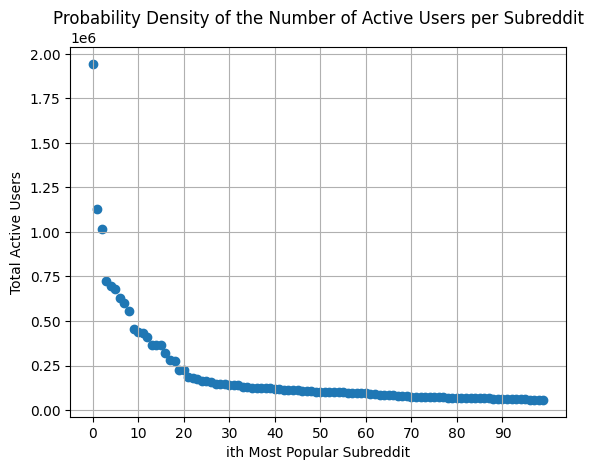

In [107]:
plt.scatter(x=popular_subreddits_top100['subreddit'], y=popular_subreddits_top100['total_active_users'])

numerical_range = range(0, len(popular_subreddits_top100['subreddit']), 10)
plt.xticks(numerical_range, numerical_range)
plt.title("Probability Density of the Number of Active Users per Subreddit")
plt.xlabel("ith Most Popular Subreddit")
plt.ylabel("Total Active Users")
plt.grid()

In [108]:
UserDifference = []
SubredditUsers = popular_subreddits_top100['total_active_users']

for i in range(99):
    UserDifference.append(SubredditUsers[i]/SubredditUsers[i+1])

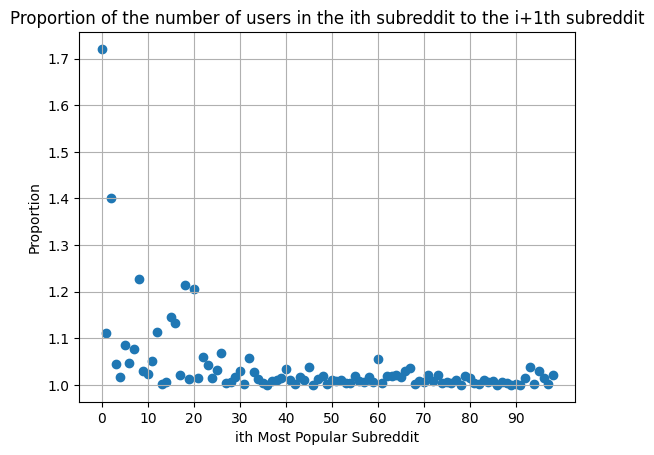

In [109]:
plt.scatter(x=range(99), y=UserDifference)

numerical_range = range(0, 99, 10)
plt.xticks(numerical_range, numerical_range)
plt.title("Proportion of the number of users in the ith subreddit to the i+1th subreddit")
plt.xlabel("ith Most Popular Subreddit")
plt.ylabel("Proportion")
plt.grid()

we can tell from the "Probability Density of the Number of Active Users per Subreddit" plot that there is a significant decrease in popularity from the ith subreddit to the i+1th subreddit, but the second plot "Proportion of the number of users in the ith subreddit to the i+1th subreddit" gives us a greater insight into the proportion of the decrease between the subreddits, as we can tell from the second polot that the proportion is not linear, decreasiing relative to a(i)^(-b) with positive contants a and b.

## Section 3.3 - Part 2 - Behavioural Analytics

### How many comments does each of these subreddits receive in a given hour of the day?

In [110]:
%%bigquery Subreddit_Comments_Hourly

SELECT subreddit, COUNT(*) as comments, EXTRACT(HOUR FROM TIMESTAMP_SECONDS(created_utc)) as hour_of_day
FROM `fh-bigquery.reddit_comments.2014` 
WHERE subreddit IN ('AskReddit','houston','gaming','askscience','unitedkingdom')
GROUP BY subreddit, hour_of_day
ORDER BY subreddit, hour_of_day

Query is running:   0%|          |

Downloading:   0%|          |

In [111]:
Subreddit_Comments_Hourly

,subreddit,comments,hour_of_day
0,AskReddit,2315849,0
1,AskReddit,2356192,1
2,AskReddit,2433752,2
3,AskReddit,2456242,3
4,AskReddit,2340474,4
...,...,...,...
115,unitedkingdom,39562,19
116,unitedkingdom,38888,20
117,unitedkingdom,38857,21
118,unitedkingdom,35808,22


In [112]:
%store Subreddit_Comments_Hourly

Stored 'Subreddit_Comments_Hourly' (DataFrame)


In [113]:
%store -r Subreddit_Comments_Hourly

Subreddit_Comments_Hourly is a dataframe containing the nuber of comments recieved at each hour of the day for the given subreddits

### When you plot these curves where the x-axis is hours from 0 to 23 andthe y-axis is counts, can you see patterns in these curves? How do these curves compare to each other? Do they have offsets relative to each other?

In [115]:
Subreddit_Comments_Hourly_AskReddit = Subreddit_Comments_Hourly[Subreddit_Comments_Hourly['subreddit'] == 'AskReddit']
Subreddit_Comments_Hourly_houstonDF = Subreddit_Comments_Hourly[Subreddit_Comments_Hourly['subreddit'] == 'houston']
Subreddit_Comments_Hourly_gamingDF = Subreddit_Comments_Hourly[Subreddit_Comments_Hourly['subreddit'] == 'gaming']
Subreddit_Comments_Hourly_askscienceDF = Subreddit_Comments_Hourly[Subreddit_Comments_Hourly['subreddit'] == 'askscience']
Subreddit_Comments_Hourly_unitedkingdomDF = Subreddit_Comments_Hourly[Subreddit_Comments_Hourly['subreddit'] == 'unitedkingdom']

Text(0, 0.5, 'Number of Comments')

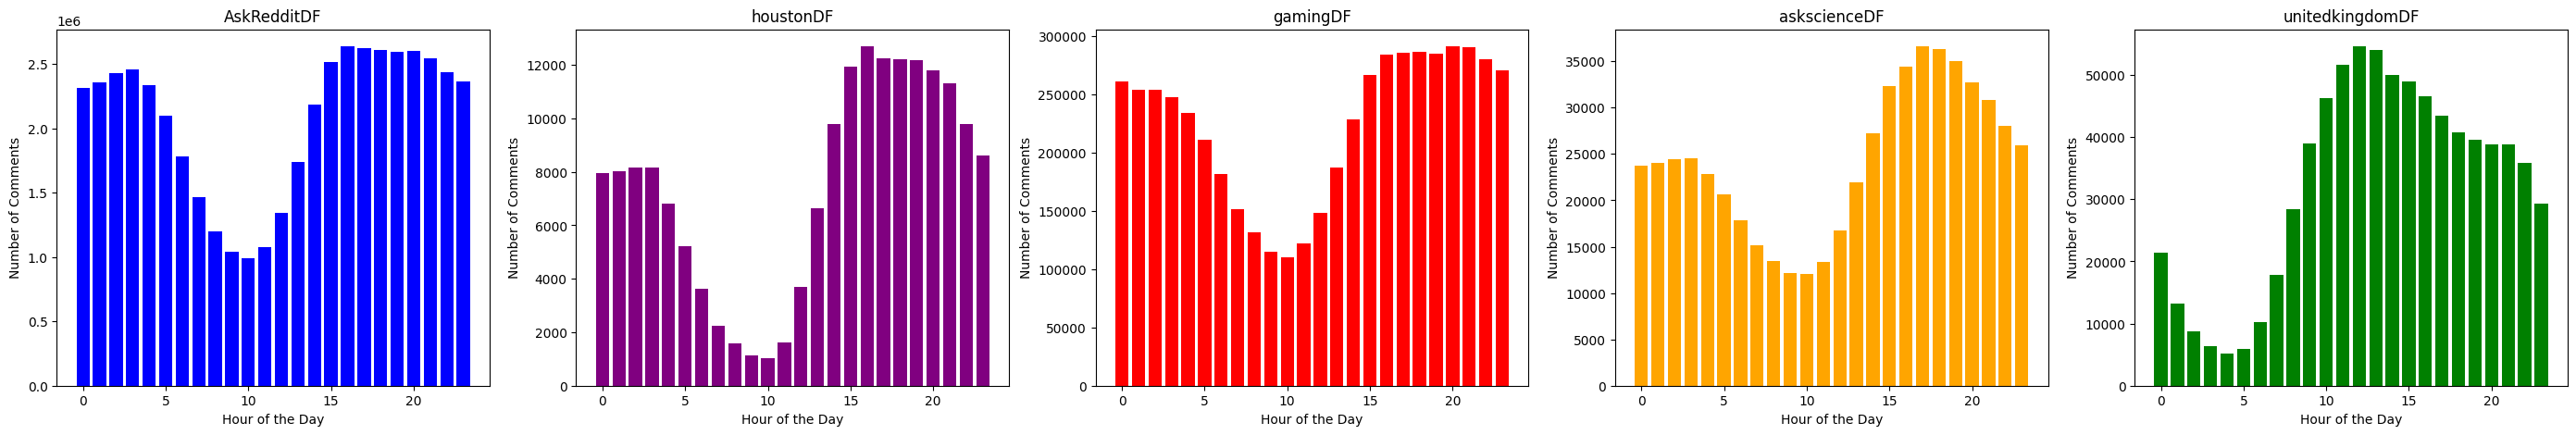

In [117]:
plt.figure(figsize=(35, 5))

plt.subplot(151)
plt.bar(x=Subreddit_Comments_Hourly_AskReddit['hour_of_day'], height=Subreddit_Comments_Hourly_AskReddit['comments'], color = 'blue')
plt.title('AskRedditDF')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Comments")

plt.subplot(152)
plt.bar(x=Subreddit_Comments_Hourly_houstonDF['hour_of_day'], height=Subreddit_Comments_Hourly_houstonDF['comments'], color = 'purple')
plt.title('houstonDF')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Comments")

plt.subplot(153)
plt.bar(x=Subreddit_Comments_Hourly_gamingDF['hour_of_day'], height=Subreddit_Comments_Hourly_gamingDF['comments'], color = 'red')
plt.title('gamingDF')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Comments")

plt.subplot(154)
plt.bar(x=Subreddit_Comments_Hourly_askscienceDF['hour_of_day'], height=Subreddit_Comments_Hourly_askscienceDF['comments'], color = 'orange')
plt.title('askscienceDF')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Comments")

plt.subplot(155)
plt.bar(x=Subreddit_Comments_Hourly_unitedkingdomDF['hour_of_day'], height=Subreddit_Comments_Hourly_unitedkingdomDF['comments'], color = 'green')
plt.title('unitedkingdomDF')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Comments")

the plots all follow a similar shape, with a clear minimum time of activity followed by a maximum roughly 6 or 7 hours later, the unitedkingdom subreddit has a significant offset in relation to the other four histograms as well as a more significant difference in the number of comments between the minimum and maximum activity times, which is also present in the houston subreddit histogram

###  If you consider the /r/unitedkingdom as being UTC, what can you say about the timezones of the users in the other subreddits?

we can see thast the average timezones of the users in the other subreddits is approximateky 5 or 6 hours ahead of the unitedkingdom subreddits average user. As there are clear similarities to the peaks and troughs of the other subreddits to the houston subreddit, which is another location based subreddit with significant drops and peaks in activity allowing us to infer that the majority of the users of that subreddit are from this specific location, we can tell that the majority of the users in the non location based subreddits are also from or around the same timezone as houston in america.

## Section 3.4 - Part 3 - Language Analytics

### What are the top 10 most frequent words in each of the five subreddits above? Do you see differences/similarities?

In [130]:
%%bigquery Subreddit_Word_Frequencies


SELECT subreddit, word, count FROM (
SELECT subreddit, word, COUNT(*) AS count, ROW_NUMBER() OVER(PARTITION BY subreddit ORDER BY COUNT(*) DESC) AS row 
FROM `fh-bigquery.reddit_comments.2014`, UNNEST(SPLIT(REGEXP_REPLACE(REGEXP_REPLACE(LOWER(body), '[[:punct:]]', ''), '  ' , ' '), ' ')) AS word 
WHERE subreddit IN ('AskReddit','houston','gaming','askscience','unitedkingdom')
GROUP BY subreddit, word) WHERE row <= 500

ORDER BY subreddit, row

Query is running:   0%|          |

Downloading:   0%|          |

In [131]:
Subreddit_Word_Frequencies_AskReddit = Subreddit_Word_Frequencies[Subreddit_Word_Frequencies['subreddit'] == 'AskReddit']
Subreddit_Word_Frequencies_AskReddit_top10 = Subreddit_Word_Frequencies_AskReddit.head(10)

Subreddit_Word_Frequencies_houstonDF = Subreddit_Word_Frequencies[Subreddit_Word_Frequencies['subreddit'] == 'houston']
Subreddit_Word_Frequencies_houstonDF_top10 = Subreddit_Word_Frequencies_houstonDF.head(10)

Subreddit_Word_Frequencies_gamingDF = Subreddit_Word_Frequencies[Subreddit_Word_Frequencies['subreddit'] == 'gaming']
Subreddit_Word_Frequencies_gamingDF_top10 = Subreddit_Word_Frequencies_gamingDF.head(10)

Subreddit_Word_Frequencies_askscienceDF = Subreddit_Word_Frequencies[Subreddit_Word_Frequencies['subreddit'] == 'askscience']
Subreddit_Word_Frequencies_askscienceDF_top10 = Subreddit_Word_Frequencies_askscienceDF.head(10)

Subreddit_Word_Frequencies_unitedkingdomDF = Subreddit_Word_Frequencies[Subreddit_Word_Frequencies['subreddit'] == 'unitedkingdom']
Subreddit_Word_Frequencies_unitedkingdomDF_top10 = Subreddit_Word_Frequencies_unitedkingdomDF.head(10)

Subreddit_Word_Frequencies_top10 = pd.concat([Subreddit_Word_Frequencies_AskReddit_top10, Subreddit_Word_Frequencies_houstonDF_top10, Subreddit_Word_Frequencies_gamingDF_top10, Subreddit_Word_Frequencies_askscienceDF_top10, Subreddit_Word_Frequencies_unitedkingdomDF_top10], ignore_index=True)

In [133]:
Subreddit_Word_Frequencies_top10

,subreddit,word,count
0,AskReddit,the,44387276
1,AskReddit,i,33582731
2,AskReddit,a,32174650
3,AskReddit,to,31572173
4,AskReddit,and,28960617
5,AskReddit,of,20712902
6,AskReddit,it,17423390
7,AskReddit,you,16781848
8,AskReddit,that,16510319
9,AskReddit,in,16280289


the dataframe Subreddit_Word_Frequencies_top10 contains the top 10 word from each subreddit, for all of the subreddits the top word was "the" followed by a mixture of other stop words, changing position, with 'AskReddit' notably being the only subreddit to have 'I' as the second most frequent word, which i believe could be due to the more personal nature of the subreddit with people asking questions.

###  What does the word-frequency distribution look like? Plot the relative frequencies of the words as a probability density function. What can you say about the word frequency you observed and the predicted by the Zipf’s Law

Text(0, 0.5, 'Probability Density')

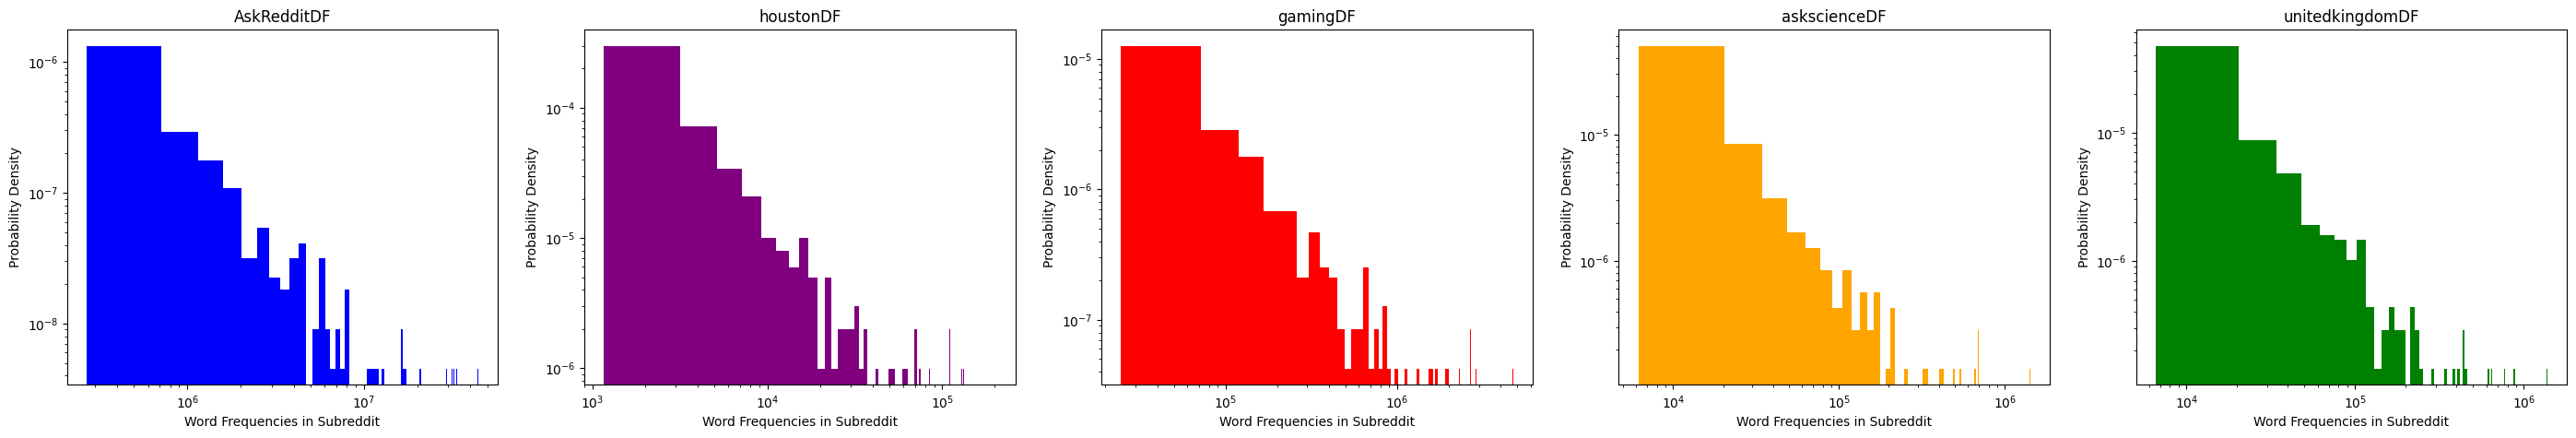

In [136]:
plt.figure(figsize=(35, 5))

plt.subplot(151)
plt.hist(x=Subreddit_Word_Frequencies_AskReddit['count'], color = 'blue', density = True, bins = 100)
plt.title('AskRedditDF')
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Word Frequencies in Subreddit")
plt.ylabel("Probability Density")

plt.subplot(152)
plt.hist(x=Subreddit_Word_Frequencies_houstonDF['count'], color = 'purple', density = True, bins = 100)
plt.title('houstonDF')
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Word Frequencies in Subreddit")
plt.ylabel("Probability Density")

plt.subplot(153)
plt.hist(x=Subreddit_Word_Frequencies_gamingDF['count'], color = 'red', density = True, bins = 100)
plt.title('gamingDF')
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Word Frequencies in Subreddit")
plt.ylabel("Probability Density")

plt.subplot(154)
plt.hist(x=Subreddit_Word_Frequencies_askscienceDF['count'], color = 'orange', density = True, bins = 100)
plt.title('askscienceDF')
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Word Frequencies in Subreddit")
plt.ylabel("Probability Density")

plt.subplot(155)
plt.hist(x=Subreddit_Word_Frequencies_unitedkingdomDF['count'], color = 'green', density = True, bins = 100)
plt.title('unitedkingdomDF')
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Word Frequencies in Subreddit")
plt.ylabel("Probability Density")

Zipfs Law states that the value of the nth entry is inversly proportional to n, which holds true for this example as the frequency of the words in the subreddits are inversly proportional to their rank